In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\s_ram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load datasets
test_data= pd.read_csv('twitter_validation.csv', header=None)
train_data = pd.read_csv('twitter_training.csv', header=None)

In [4]:
# Add column names
train_data.columns = ['id', 'information', 'type', 'text']
test_data.columns = ['id', 'information', 'type', 'text']

In [5]:
train_data.head(5)

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
test_data.head(5)

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
#Check for missing values
train_data.isnull().sum()
test_data.isnull().sum()

id             0
information    0
type           0
text           0
dtype: int64

In [8]:
#Drop missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()
test_data.isnull().sum()

id             0
information    0
type           0
text           0
dtype: int64

In [10]:
# Combine the datasets for preprocessing
data = pd.concat([train_data,test_data])

In [11]:
# Function to clean the text
def clean_text(text):
    if isinstance(text, float):
        return ''
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return ' '.join(text)

In [12]:
# Apply text cleaning
data['text'] = data['text'].apply(clean_text)

In [13]:
# Encode sentiment labels
label_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 2}
data['type'] = data['type'].map(label_mapping)

In [14]:
# Split back into training and validation sets
train_data = data.iloc[:len(train_data)]
test_data = data.iloc[len(train_data):]

In [15]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

C:\Users\s_ram\AppData\Local\Temp\ipykernel_10216\2168025489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(inplace=True)
C:\Users\s_ram\AppData\Local\Temp\ipykernel_10216\2168025489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.dropna(inplace=True)


In [16]:
# Extract features and labels
X_train = train_data['text']
y_train = train_data['type']
X_val = test_data['text']
y_val = test_data['type']

In [17]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_val_vect = vectorizer.transform(X_val) 

In [18]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

In [19]:
# Train the model
model.fit(X_train_vect, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Make predictions
y_pred = model.predict(X_val_vect)

In [21]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=['Negative', 'Positive', 'Neutral']))

Accuracy: 0.9625603864734299

Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.96      0.96       266
    Positive       0.95      0.97      0.96       277
     Neutral       0.97      0.95      0.96       285

    accuracy                           0.96       828
   macro avg       0.96      0.96      0.96       828
weighted avg       0.96      0.96      0.96       828



In [22]:
# Function to predict sentiment of a new sentence
def predict_sentiment(sentence):
    clean_sentence = clean_text(sentence)
    vect_sentence = vectorizer.transform([clean_sentence])
    prediction = model.predict(vect_sentence)
    sentiment_mapping = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}
    return sentiment_mapping[prediction[0]]

In [23]:
# Input a sentence and predict its sentiment
user_input = input("Enter a sentence: ")
sentiment = predict_sentiment(user_input)
print(f"Sentiment: {sentiment}")

Enter a sentence: I love this product
Sentiment: Positive


In [24]:
# Input a sentence and predict its sentiment
user_input = input("Enter a sentence: ")
sentiment = predict_sentiment(user_input)
print(f"Sentiment: {sentiment}")

Enter a sentence: I Dont like this product at all
Sentiment: Negative


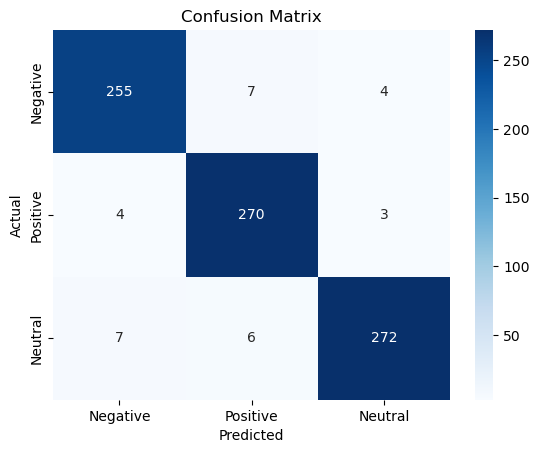

In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

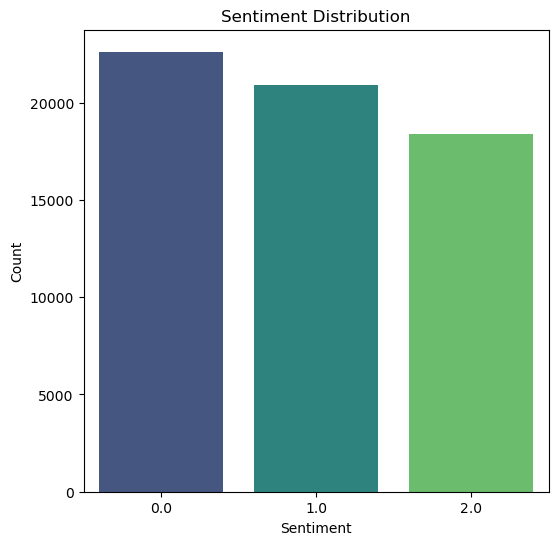

In [26]:
# Sentiment Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2])
plt.show()